# Practical Lab 4 - Polynomial Regression, R-Squared, MAPE
## 1. Get the data

Data Source: [link](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes(as_frame=True)

## 2. Problem

In this lab, the goal is to develop a model that predicts the risk of diabetes progression based on the given Body Mass Index (BMI). This would be used as a screening tool to assess the risk level of patients.

## 3. EDA

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_df = diabetes.frame
diabetes_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [13]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


The dataset comprises a total of 10 independent variables as follows:
- Age in years
- Sex
- Body Mass Index (BMI)
- Average blood pressure (BP)
- TC, total serum cholesterol (S1)
- LDL, low-density lipoproteins (S2)
- HDL, high-density lipoproteins (S3)
- TCH, total cholesterol / HDL (S4)
- LTG, possibly the log of serum triglycerides level (S5)
- Glucose level (S6)

It is noted that the values of the first 10 columns have been scaled by the standard deviation times the square root of the number of samples so that the sum of squares of each column totals 1. This scaling is a form of standardization to ensure that each feature contributes equally to the analysis.<br>The target, the last column, quantitatively represents the degree of disease progression one year after baseline.

<Axes: >

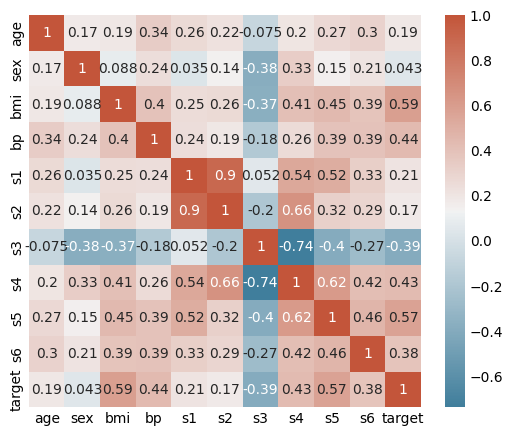

In [20]:
f, ax = plt.subplots(figsize=(5, 4))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(diabetes_df.corr(), annot=True, cmap=cmap)

We aim to create a model that predicts the progression of diabetes based on BMI. Therefore, we first examined the correlation between BMI and the degree of diabetes progression using a correlation matrix. Upon reviewing the correlation matrix, it was found that the correlation between BMI and the progression of diabetes is the highest compared to other independent variables. Thus, it is reasonable to conclude that creating a prediction model based on BMI is justified.

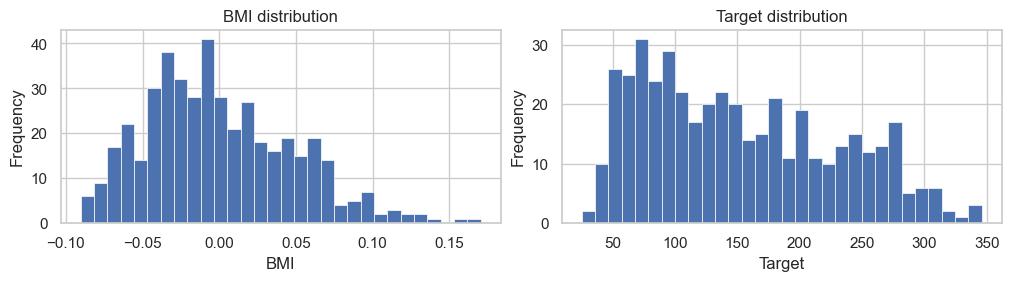

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2.7), layout='constrained')
ax1.hist(diabetes_df['bmi'], bins=30, linewidth=0.5, edgecolor="white")
ax1.set_title('BMI distribution')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Frequency')

ax2.hist(diabetes_df['target'], bins=30, linewidth=0.5, edgecolor="white")
ax2.set_title('Target distribution')
ax2.set_xlabel('Target')
ax2.set_ylabel('Frequency')

plt.show()

The histogram illustrates the distribution of Body Mass Index (BMI) values within the dataset. Observing the distribution, we can infer that it closely approximates a normal distribution, which indicates that the dataset is appropriate for use in model training. Additionally, we can observe that the BMI values range from just above -0.1 to just below 0.2, while the target values, which represent the degree of diabetes progression, range from 0 to 350.

## 4. Clean the data

<Axes: xlabel='bmi', ylabel='target'>

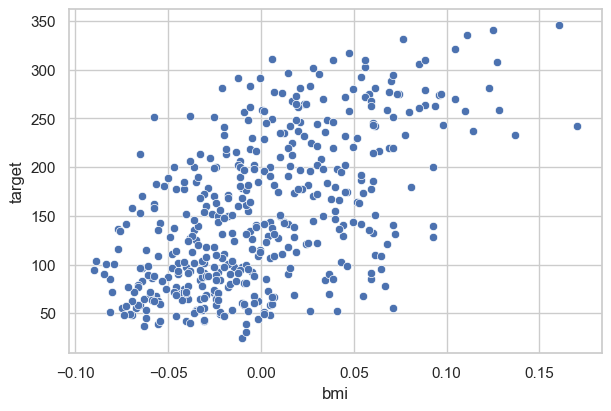

In [41]:
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
sns.scatterplot(x="bmi", y="target", data=diabetes_df)

In [38]:
count = 0
for val in diabetes_df['bmi']:
    if val > -0.1 and val < 0.2:
        count += 1
print(count)

count = 0
for val in diabetes_df['target']:
    if val > 0 and val < 350:
        count += 1
print(count)

442
442


The scatter plot illustrating the relationship between BMI and the target variable indicates a positive correlation. There are no apparent outliers, and all the values for both BMI and the target fall within the given range, confirming that they are valid for analysis. Additionally, The exclusion of specific values may occur overfitting of the model. Therefore, it seems unnecessary to perform data preprocessing in this case. 

## 5. Split the dataset to a train (70%), validation (15%) and test (15%) sets

In [44]:
train_size = int(len(diabetes_df) * 0.7)
train = diabetes_df[:train_size]
test = diabetes_df[train_size:]
test_size = int(len(test) * 0.5)
valid = test[:test_size]
test = test[test_size:]

<Axes: xlabel='bmi', ylabel='target'>

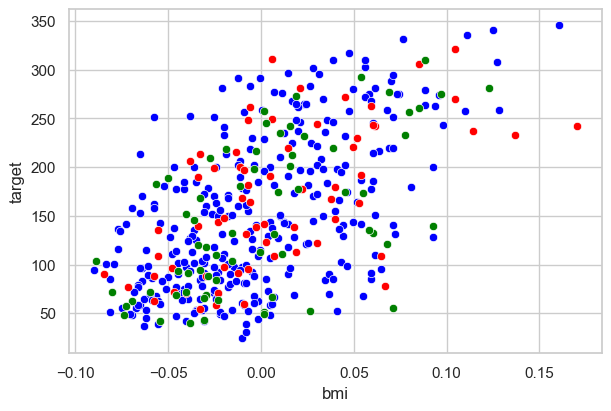

In [46]:
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
sns.scatterplot(x="bmi", y="target", data=train, color="blue")
sns.scatterplot(x="bmi", y="target", data=valid, color="red")
sns.scatterplot(x="bmi", y="target", data=test, color="green")

The scatter plot allows us to visualize how the train, validation, and test sets are split. The color of the training set is blue, the validation set is red, and the test set is green.

## 6. Polynomial regression

In [49]:
import numpy as np
from typing import List
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [68]:
def create_polynomial_models(X, y, degrees: List[int]) -> dict[int, np.poly1d]:
    """
    Creates polynomial models for the given degrees and fits them to the given data.

    Args
        X: The x values of the data.
        y: The y values of the data.
        degrees: A list of polynomial degrees to try.

    Returns:
        A dictionary of polynomial models, with the polynomial degree as the key.
    """

    models = {}
    for degree in degrees:
        model = Pipeline([('polynomial', PolynomialFeatures(degree=degree)),
                          ('linear', LinearRegression())])
        model.fit(X, y)
        models[degree] = model
    return models

degrees = list(range(0, 6))
models = create_polynomial_models(X=train[['bmi']], y=train[['target']], degrees=degrees)
models


{0: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                 ('linear', LinearRegression())]),
 1: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                 ('linear', LinearRegression())]),
 2: Pipeline(steps=[('polynomial', PolynomialFeatures()),
                 ('linear', LinearRegression())]),
 3: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())]),
 4: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=4)),
                 ('linear', LinearRegression())]),
 5: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                 ('linear', LinearRegression())])}

## 7. Compare the six models using the training and validation data

### 7-1. R-squared, MAPE and MAE

In [71]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

for degree, model in models.items():
    print(f"Degree: {degree}")

    y_pred_t = model.predict(train[['bmi']])
    r2 = r2_score(train[['target']], y_pred_t)
    mape = mean_absolute_percentage_error(train[['target']], y_pred_t)
    mae = mean_absolute_error(train[['target']], y_pred_t)
    print(f"[TRAIN] R2: {r2}, MAPE: {mape}, MAE: {mae}")

    y_pred_v = model.predict(valid[['bmi']])
    r2 = r2_score(valid[['target']], y_pred_v)
    mape = mean_absolute_percentage_error(valid[['target']], y_pred_v)
    mae = mean_absolute_error(valid[['target']], y_pred_v)
    print(f"[VALIDATION] R2: {r2}, MAPE: {mape}, MAE: {mae}\n")




Degree: 0
[TRAIN] R2: 0.0, MAPE: 0.6285007633022878, MAE: 65.69952137074392
[VALIDATION] R2: -0.06843900547489135, MAPE: 0.44266359693287144, MAE: 62.19569481219966

Degree: 1
[TRAIN] R2: 0.3391503044527787, MAPE: 0.48879771700533403, MAE: 52.19634802757251
[VALIDATION] R2: 0.3167996588361669, MAPE: 0.34611031591084374, MAE: 48.678835618467076

Degree: 2
[TRAIN] R2: 0.3438067683933749, MAPE: 0.48485560497295027, MAE: 51.8014663893258
[VALIDATION] R2: 0.26875193642245365, MAPE: 0.3481501081704936, MAE: 49.71301427166434

Degree: 3
[TRAIN] R2: 0.3441850396545787, MAPE: 0.4834098166209495, MAE: 51.71986277769281
[VALIDATION] R2: 0.2807178918716273, MAPE: 0.34555765500985947, MAE: 49.31014931864143

Degree: 4
[TRAIN] R2: 0.34637096280637425, MAPE: 0.4815713719176144, MAE: 51.60769487682803
[VALIDATION] R2: 0.24113452213981834, MAPE: 0.3490724845292865, MAE: 50.447371378347604

Degree: 5
[TRAIN] R2: 0.34665261614871623, MAPE: 0.48159327356735704, MAE: 51.591594136603135
[VALIDATION] R2: 0.2

### 7-2. Conclusion

I would say the best predictive model is the model with degree 1. In predictive modeling, a lower MAE and MAPE and an R-squared value closer to 1 indicate better performance. When evaluating the performance on the validation set for each metric, we can observe the following ranking by degree:

- R-squared: 1 -> 3 -> 2 -> 5 -> 4 -> 0
- MAPE: 3 -> 1 -> 5 -> 2 -> 4 -> 0
- MAE: 1 -> 3 -> 2 -> 5 -> 4 -> 0

Based on R-squared and MAE, the model with degree 1 performs the best, whereas, for MAPE, the model with degree 3 is superior. However, the differences in MAPE values are not very significant, while the other metrics show a noticeable disparity. Additionally, we must consider the potential for overfitting as the degree of the polynomial increases. Taking all these factors into account, the best predictive model is the one with degree 1.

#### 7-2-1. Run the chosen model on the test set, and report R-Squared, MSE and MAE

In [77]:
y_pred_tt = models[1].predict(test[['bmi']])
r2 = r2_score(test[['target']], y_pred_tt)
mape = mean_absolute_percentage_error(test[['target']], y_pred_tt)
mae = mean_absolute_error(test[['target']], y_pred_tt)
print(f"[TEST] Degree: 1, R2: {r2}, MAPE: {mape}, MAE: {mae}")

[TEST] Degree: 1, R2: 0.3538523087303761, MAPE: 0.5202865439563416, MAE: 51.91205842533073


#### 7-2-2. Plot a graph of the train, validation and test datapoints, and the fit of the chosen model over each of them

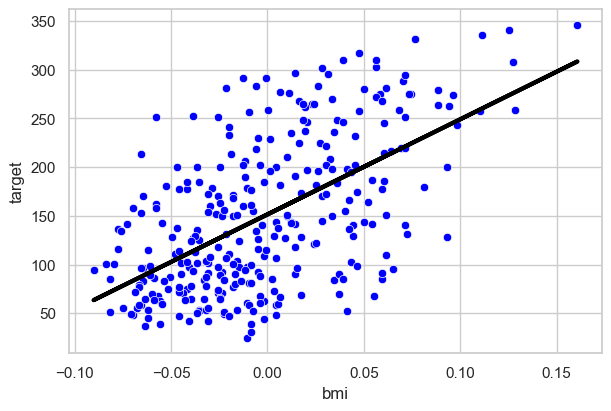

In [81]:
# plot the regression line against the training data
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
sns.scatterplot(x="bmi", y="target", data=train, color="blue")
plt.plot(train[["bmi"]], models[1].predict(train[["bmi"]]), color="black", linewidth=3)
plt.show()

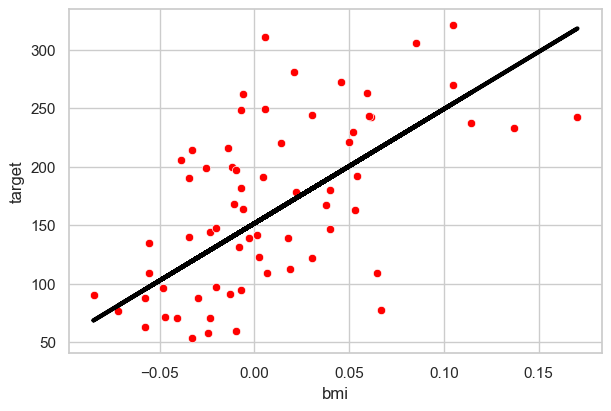

In [82]:
# plot the regression line against the validation data
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
sns.scatterplot(x="bmi", y="target", data=valid, color="red")
plt.plot(valid[["bmi"]], models[1].predict(valid[["bmi"]]), color="black", linewidth=3)
plt.show()

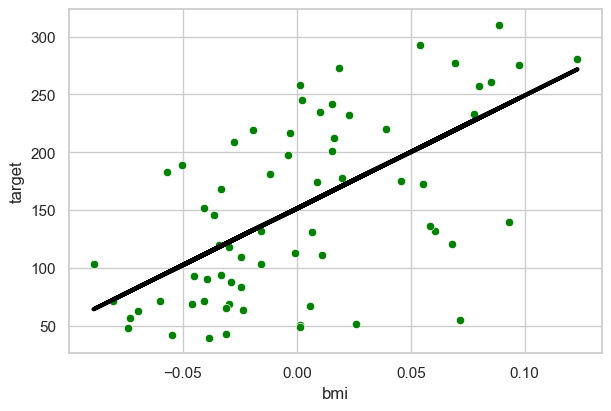

In [83]:
# plot the regression line against the test data
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
sns.scatterplot(x="bmi", y="target", data=test, color="green")
plt.plot(test[["bmi"]], models[1].predict(test[["bmi"]]), color="black", linewidth=3)
plt.show()

#### 7-2-3. Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient). Manually calculate the expected diabetes progression for a BMI value of your choice, and compare it to model.perdict() for that value

In [87]:
def print_pipeline_model_stats(model):
    # print model    
    print(f'Model: {model}')
    print(f'Coefficients: {model[-1].coef_[0][1:]}')
    print(f'Intercept: {model[-1].intercept_[0]}')
    # generate equation string:
    equation = f"y = {model[-1].intercept_[0]:.2f}"
    for ind, coeff in enumerate(model[-1].coef_[0][1:]):
        degree = ind + 1
        equation += f" + {coeff:.2f}x^{degree}"
    print(f'Equation: {equation}')
    print('***')

print_pipeline_model_stats(models[1])

Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])
Coefficients: [976.10822731]
Intercept: 151.55092418989693
Equation: y = 151.55 + 976.11x^1
***


Using the equation ( y = 151.55 + 976.11x), if we give a BMI value of 0.08, we obtain a predicted diabetes progression value of 229.64. Similarly, using the model.predict() function with an input of 0.08, we can confirm that it outputs a value of 229.64, matching the manually calculated result.

In [88]:
print(models[1].predict([[0.08]]))

[[229.63958237]]


c:\Users\flag8\Work\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### 7-3. How many trainable parameters are we fitting for each of the six models?

In [99]:
for degree, model in models.items():
    features = models[degree][0].get_feature_names_out()
    print(f"Trainable parameters for degree {degree}: {features}")

Trainable parameters for degree 0: ['1']
Trainable parameters for degree 1: ['1' 'bmi']
Trainable parameters for degree 2: ['1' 'bmi' 'bmi^2']
Trainable parameters for degree 3: ['1' 'bmi' 'bmi^2' 'bmi^3']
Trainable parameters for degree 4: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4']
Trainable parameters for degree 5: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


| Degree | Num of Trainable Parameters | Descrption |
|--------|-----------------------------|------------|
| 0 | 1 | intercept |
| 1 | 2 | intercept, coefficient of the linear function |
| 2 | 3 | intercept, coefficients of the quadratic function |
| 3 | 4 | intercept, coefficients of the cubic function |
| 4 | 5 | intercept, coefficients of the quartic function |
| 5 | 6 | intercept, coefficients of the quintic function |